In [12]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [13]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [14]:
ptv_result = [0] * 9

In [15]:
with open(f'ptv_cbi_q_10.pickle', mode='rb') as fp:
    ptv_result[0] = pickle.load(fp)
with open(f'ptv_cbi_q_20.pickle', mode='rb') as fp:
    ptv_result[1] = pickle.load(fp)
# with open(f'ptv_cbi_q_30.pickle', mode='rb') as fp:
#     ptv_result[2] = pickle.load(fp)
with open(f'ptv_cbi_q_30_high.pickle', mode='rb') as fp:
    ptv_result[2] = pickle.load(fp)
with open(f'ptv_rbi_q_10_1.pickle', mode='rb') as fp:
    ptv_result[3] = pickle.load(fp)
with open(f'ptv_rbi_q_10_2.pickle', mode='rb') as fp:
    ptv_result[4] = pickle.load(fp)
with open(f'ptv_rbi_q_20_1.pickle', mode='rb') as fp:
    ptv_result[5] = pickle.load(fp)
with open(f'ptv_rbi_q_20_2.pickle', mode='rb') as fp:
    ptv_result[6] = pickle.load(fp)
with open(f'ptv_rbi_q_30_1.pickle', mode='rb') as fp:
    ptv_result[7] = pickle.load(fp)
with open(f'ptv_rbi_q_30_2.pickle', mode='rb') as fp:
    ptv_result[8] = pickle.load(fp)

In [16]:
for i in range(9):
    ptv_result[i]['r'] = np.sqrt(ptv_result[i]['x']**2 + ptv_result[i]['y']**2)

In [17]:
px2mm = 1000 / np.sqrt((498 - 488)**2 + (391 - 646)**2)
fps = 25

In [18]:
res_sort = [0] * 9

for i in range(9):
    res_sort[i] = ptv_result[i].sort_values(by='r', ascending=True).values

In [19]:
_iter = 50
res = [0]*9
res2 = [0]*9

In [20]:
for c in range(9):
    r_dr_err = np.zeros((5001, 3))
    r_dr_in = np.zeros((1, 2))
    r_dr_err[:, :] = np.nan
    r_dr_in[:, :] = np.nan

    for i in tqdm(range(0, 5001, _iter)):
        res_sort_l = res_sort[c][np.where(res_sort[c][:, 4] >= i/10)]
        res_sort_lr = res_sort_l[np.where(res_sort_l[:, 4] < (i+_iter)/10)]
        columns = ['x', 'y', 'dx', 'dy', 'r', 'theta', 'dr']
        df = pd.DataFrame(data=res_sort_lr, columns=columns, dtype='float')
        q1 = df['dr'].quantile(0.25)
        q2 = df['dr'].quantile(0.75)
        iqr = q2 - q1

        upper = q2 + 1.5 * iqr
        bottom = q1 - 1.5 * iqr
        _in = df[(df['dr'] >= bottom) & (df['dr'] <= upper)].values
        tmp = np.array([_in[:, 4], _in[:, 6]]).T
        r_dr_in = np.vstack([r_dr_in, tmp])

        r_dr_err[i, 0] = i
        r_dr_err[i, 1] = np.mean(tmp, axis=0)[1]
        r_dr_err[i, 2] = np.std(tmp, axis=0)[1]

    r_dr_err = r_dr_err[::_iter]
    res[c] = r_dr_err
    res2[c] = r_dr_in

100%|██████████| 101/101 [00:00<00:00, 140.54it/s]


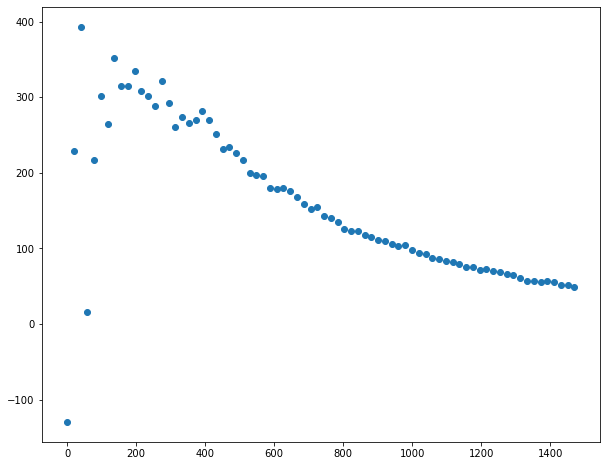

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps)
plt.show()

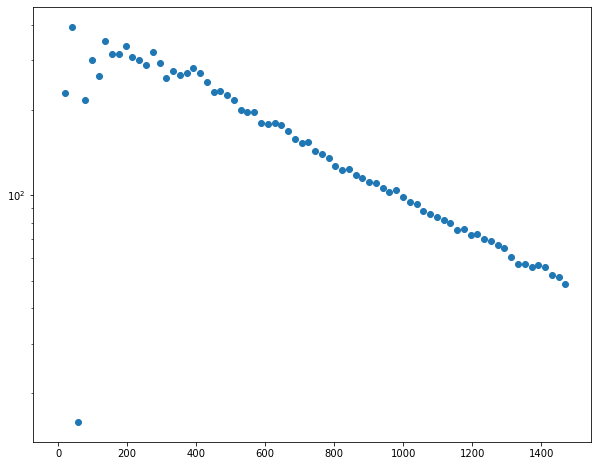

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_yscale("log")
ax.scatter(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps)
plt.show()

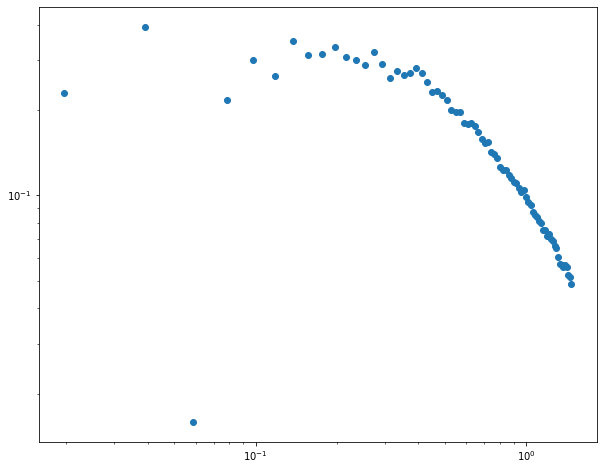

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(res[0][:-25, 0]*px2mm/10/1e3, res[0][:-25, 1]*px2mm*fps/1e3)
plt.show()